# **Iris Dataset**

### Data Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("iris.csv")

In [4]:
df.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [6]:
df = df.drop(columns = ['Unnamed: 0'])

In [7]:
df = df.sample(frac=1).reset_index(drop=True)

In [15]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.0,2.3,3.3,1.0,versicolor
1,5.7,3.0,4.2,1.2,versicolor
2,6.2,3.4,5.4,2.3,virginica
3,5.8,2.7,3.9,1.2,versicolor
4,4.9,3.0,1.4,0.2,setosa


In [16]:
df.tail()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
145,6.1,2.6,5.6,1.4,virginica
146,6.5,3.0,5.5,1.8,virginica
147,4.6,3.6,1.0,0.2,setosa
148,5.4,3.0,4.5,1.5,versicolor
149,4.6,3.1,1.5,0.2,setosa


In [18]:
df.shape

(150, 5)

In [19]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Text(0.5, 1.0, 'Iris Species')

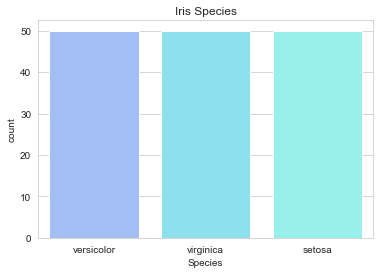

In [70]:
colors = ["#96BAFF","#7DEDFF","#88FFF7" ]
sns.set_palette(sns.color_palette(colors))
ax = sns.countplot(x="Species", data=df)
ax.set_title("Iris Species")

We can see that all the species are in equal numbers

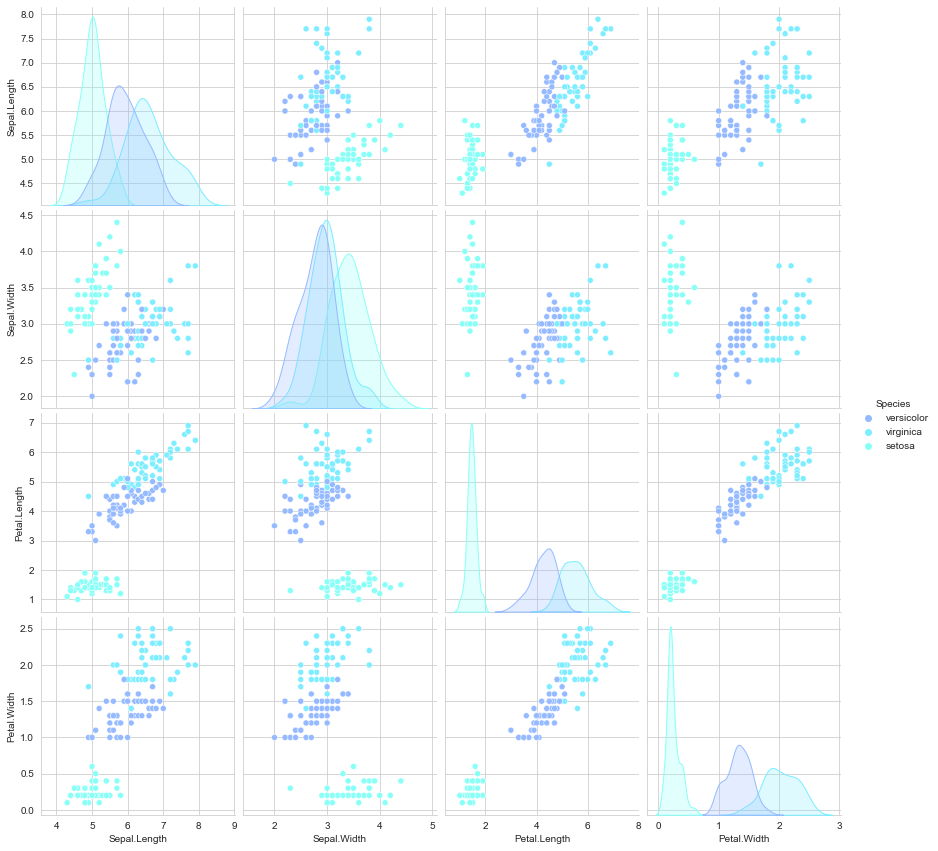

In [71]:
sns.set_style("whitegrid");
sns.pairplot(df,hue="Species",height=3);
plt.show()

### **Key observations**:
* There is overlap in the species versicolor and virginica. Setosa is very different from the rest
* Petal length and petal width are the most useful features to identify various flower types as they have the least overlap

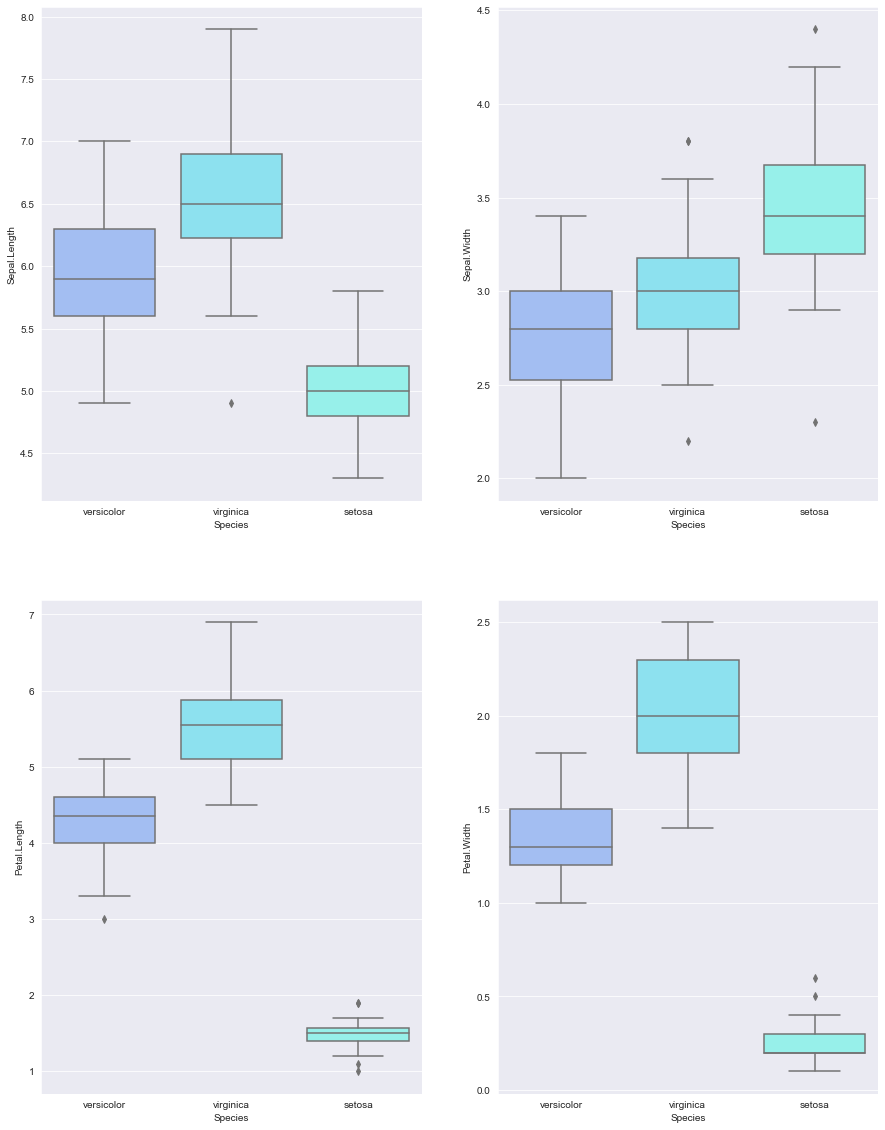

In [110]:
names = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']
fig, axes = plt.subplots(2,2, figsize = (15,20))
for name,ax in zip(names, axes.flatten()):
     sns.boxplot(y=name, x= "Species", data=df, ax=ax)

### **Key Observations**
* Petal length and Petal Width have the most distinct values with less range 

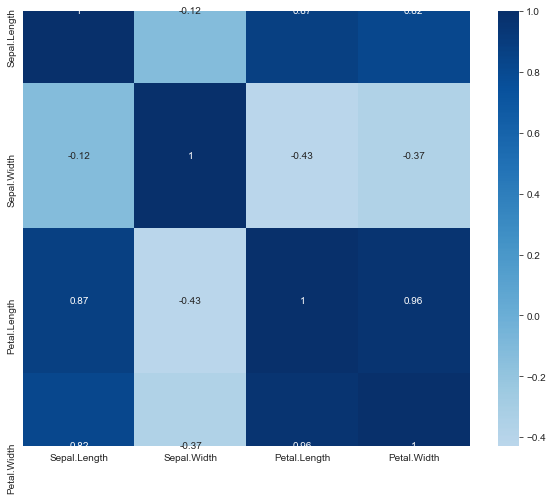

In [117]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, annot=True, ax=ax,center = 0, cmap="Blues")

In [14]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

### Logistic regression Model

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression()

In [16]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777
